<a href="https://colab.research.google.com/github/solee328/LikeLion_EDA/blob/tituschoi/COVID19_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID19_EDA.ipynb
Description   : COVID19 EDA mini project<br>
Date : 2021.04.06 ~ 2021.04.09 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
# 필요 라이브러리 로드

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#1. 2020년 ~ 2021년 모빌리티 보고서 분석

구글 모빌리티 증감 추이 자료입니다. 2020년부터 2021년 3월까지의 자료를 통해 사람들의 모빌리티 증감추이를 확인할 수 있습니다. 해당 데이터는 서울 기준(Seoul Metropolitan)으로 작성하였습니다. 데이터에서 NaN값이 증감률에는 존재하지 않으므로 전처리를 할 필요는 없다고 판단했습니다. 날짜별로 데이터를 선 형태로 증감률을 표현하기로 결정하였고, 이를 한 눈에 볼 수 있도록 2020년 데이터셋과 2021년 데이터셋을 한꺼번에 그려 두개의 최종 그래프를 도출하였습니다.

In [10]:
# 2020년 모빌리티 데이터 로드
google_2020_df = pd.read_csv("/content/drive/MyDrive/COVID19_EDA/datasets/2020_KR_Region_Mobility_Report.csv")
# 2021년 모빌리티 데이터 로드
google_2021_df = pd.read_csv("/content/drive/MyDrive/COVID19_EDA/datasets/2021_KR_Region_Mobility_Report.csv")
# 2020년 데이터 크기 확인
print(google_2020_df.shape)
# 2020년 데이터 상단 출력
display(google_2020_df.head())

(642, 15)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-15,-4,0,3,-6,1,3
1,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-16,-11,0,-31,-15,-3,4
2,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-17,-7,-6,-17,-6,0,5
3,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-18,-1,-3,-5,-3,2,2
4,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2020-02-19,-5,-1,14,-4,1,2


In [56]:
# 2021년 데이터 크기 확인
print(google_2021_df.shape)
# 2021년 데이터 상단 출력
display(google_2021_df.head())

(164, 15)


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-01,-42,0,12,-46,-75,31
1,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-02,-34,1,-17,-34,-32,15
2,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-03,-35,3,-18,-32,-23,11
3,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-04,-18,7,3,-14,-10,9
4,KR,South Korea,NaN,NaN,NaN,NaN,NaN,ChIJm7oRy-tVZDURS9uIugCbJJE,2021-01-05,-20,1,-12,-16,-11,8


In [98]:
# 데이터 시각화(2020년 2월 15일 ~ 2020년 12월 31일)

seoul_start_index = 321
# 날짜별 식당, 카페, 쇼핑센터, 놀이공원, 박물관, 도서관,영화관과 같은 장소에서 나타난 이동 추이
google_2020_df1 = google_2020_df.loc[seoul_start_index:, ['date','retail_and_recreation_percent_change_from_baseline']]

# 날짜별 식료품 매장, 식자재 창고, 농산물 시장, 전문 식품 매장, 드럭스토어, 약국과 같은 장소에서 나타난 이동 추이
google_2020_df2 = google_2020_df.loc[seoul_start_index:, ['date','grocery_and_pharmacy_percent_change_from_baseline']]

# 날짜별 국립공원, 공용 해수욕장, 정박지, 반려견 공원, 광장, 공공 정원과 같은 장소에서 나타난 이동 추이
google_2020_df3 = google_2020_df.loc[seoul_start_index:, ['date','parks_percent_change_from_baseline']]

# 날짜별 지하철, 버스, 기차역 등의 대중교통 허브와 같은 장소 에서 나타난 이동 추이
google_2020_df4 = google_2020_df.loc[seoul_start_index:, ['date','transit_stations_percent_change_from_baseline']]

# 날짜별 직장에서 나타난 이동 추이
google_2020_df5 = google_2020_df.loc[seoul_start_index:, ['date','workplaces_percent_change_from_baseline']]

# 날짜별 거주지에서 나타난 이동 추이
google_2020_df6 = google_2020_df.loc[seoul_start_index:, ['date','residential_percent_change_from_baseline']]

<Figure size 432x288 with 0 Axes>

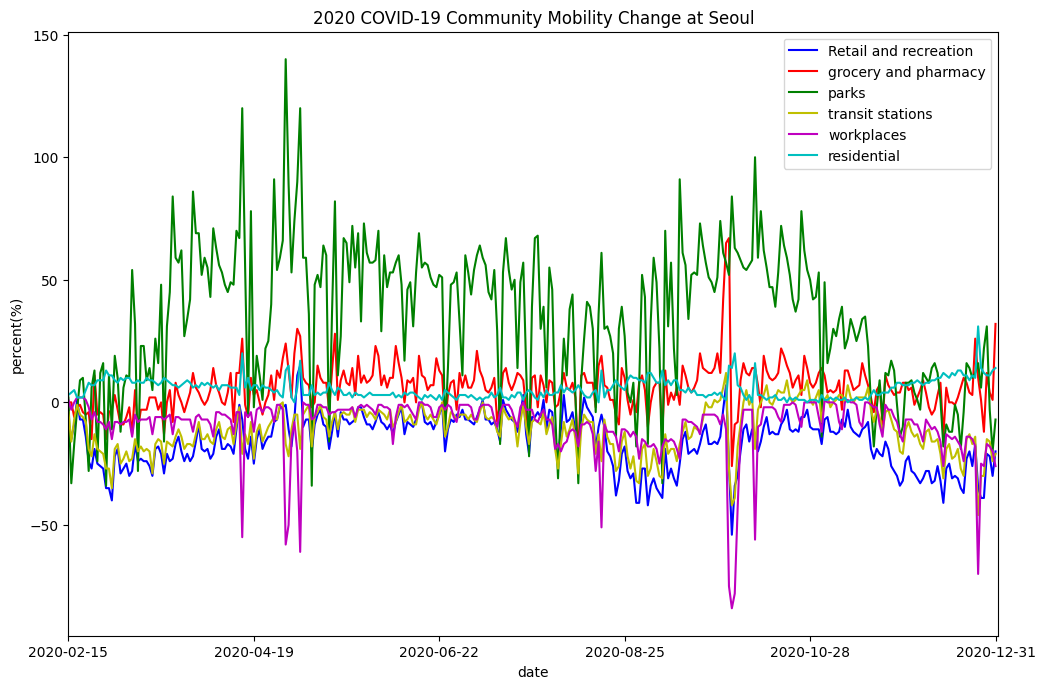

In [99]:
# 모든 데이터 legend 처리 후 시각화

fig = plt.figure()
fig = plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k') # figure 크기 변경
ax = fig.add_subplot(1,1,1)
ax.plot(
    google_2020_df1['date'], google_2020_df1['retail_and_recreation_percent_change_from_baseline'], 'b-'
       )

ax.plot(
    google_2020_df2['date'], google_2020_df2['grocery_and_pharmacy_percent_change_from_baseline'], 'r-'
       )

ax.plot(
    google_2020_df3['date'], google_2020_df3['parks_percent_change_from_baseline'], 'g-'
       )

ax.plot(
    google_2020_df4['date'], google_2020_df4['transit_stations_percent_change_from_baseline'], 'y-'
       )

ax.plot(
    google_2020_df5['date'], google_2020_df5['workplaces_percent_change_from_baseline'], 'm'
       )

ax.plot(
    google_2020_df6['date'], google_2020_df6['residential_percent_change_from_baseline'], 'c'
       )

ax.set_title('2020 COVID-19 Community Mobility Change at Seoul')
ax.set_xlabel('date')
ax.set_ylabel('percent(%)')
plt.legend(['Retail and recreation', 'grocery and pharmacy', 'parks', 'transit stations', 'workplaces', 'residential'])
plt.xlim([0, seoul_start_index])
plt.xticks(np.arange(0, seoul_start_index, int(seoul_start_index/5)))
plt.show()

In [100]:
# 데이터 시각화(2021년 1월 1일 ~ 2021년 3월 23일)

seoul_start_index = 82
# 날짜별 식당, 카페, 쇼핑센터, 놀이공원, 박물관, 도서관,영화관과 같은 장소에서 나타난 이동 추이
google_2021_df1 = google_2021_df.loc[seoul_start_index:, ['date','retail_and_recreation_percent_change_from_baseline']]

# 날짜별 식료품 매장, 식자재 창고, 농산물 시장, 전문 식품 매장, 드럭스토어, 약국과 같은 장소에서 나타난 이동 추이
google_2021_df2 = google_2021_df.loc[seoul_start_index:, ['date','grocery_and_pharmacy_percent_change_from_baseline']]

# 날짜별 국립공원, 공용 해수욕장, 정박지, 반려견 공원, 광장, 공공 정원과 같은 장소에서 나타난 이동 추이
google_2021_df3 = google_2021_df.loc[seoul_start_index:, ['date','parks_percent_change_from_baseline']]

# 날짜별 지하철, 버스, 기차역 등의 대중교통 허브와 같은 장소 에서 나타난 이동 추이
google_2021_df4 = google_2021_df.loc[seoul_start_index:, ['date','transit_stations_percent_change_from_baseline']]

# 날짜별 직장에서 나타난 이동 추이
google_2021_df5 = google_2021_df.loc[seoul_start_index:, ['date','workplaces_percent_change_from_baseline']]

# 날짜별 거주지에서 나타난 이동 추이
google_2021_df6 = google_2021_df.loc[seoul_start_index:, ['date','residential_percent_change_from_baseline']]

          date  retail_and_recreation_percent_change_from_baseline
82  2021-01-01                                                -50 
83  2021-01-02                                                -40 
84  2021-01-03                                                -40 
85  2021-01-04                                                -26 
86  2021-01-05                                                -24 
